## <code style="color:steelblue">Student Name: Zheyuan Dong</code>

#### COMPANION WORKBOOK

# Classification Algorithms

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Binary Classification

#### First, let's import the libraries that we'll need (again, we purposely left this blank to allow you to practice this for yourself).
* If you forget a library, you can always add it later and re-run this code cell.

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set_style('white')



In [2]:
# Explore the employees raw data again
raw_df = pd.read_csv('employee_data.csv')

print( raw_df.status.unique() )

raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [4]:
# In ABT, we want the class to be some numerical value 

abt_df = pd.read_csv('analytical_base_table.csv')
abt_df.status.value_counts()

0    10701
1     3367
Name: status, dtype: int64

## II. Simulation: Noisy Conditional

In [9]:
# Input feature 
x = np.linspace(0, 1, 100)

# Noise
np.random.seed(111)
epsilon= np.random.uniform(-0.2,0.2, 100)

# Target variable
y = (x+ epsilon > 0.5).astype(int)

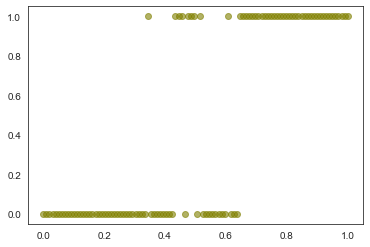

In [10]:
# Visualize
plt.scatter(x, y, alpha=0.6, color= 'olive')
plt.show()

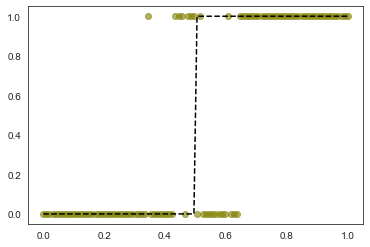

In [11]:
# OVerlay with the true underlying relationship between X and Y
plt.scatter(x, y, alpha=0.6, color= 'olive')
plt.plot(x, x>0.5, 'k--')
plt.show()

## III. Logistic Regression

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [14]:
# Reshape X to 2 dimension, as required by the algorihtm 
X = x.reshape(100, 1)
print(X[:5])

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]]


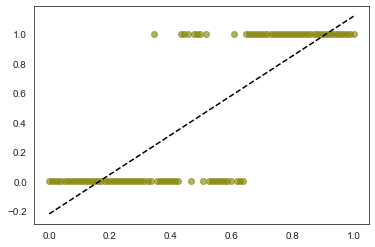

In [15]:
# How linear regression looks like 
model = LinearRegression()
model.fit(X, y)

plt.scatter(x, y, alpha=0.6, color= 'olive')
plt.plot(x, model.predict(X), 'k--')
plt.show()

Two rooms for improvements:
<br> 1) The probability should not be over 1 or below 0
<br> 2) We want high confidence level near the two ends, i.e. the predicted probability should be higher

In [17]:
# Fit logistic regression
model= LogisticRegression()
model.fit(X,y)

model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Get specific probabilities instead of direct predicted class
probHat= model.predict_proba(X[:10])
probHat  # Each row gives probability of y= 0 and y=1

array([[0.91205344, 0.08794656],
       [0.90864036, 0.09135964],
       [0.90510859, 0.09489141],
       [0.90145511, 0.09854489],
       [0.89767687, 0.10232313],
       [0.89377083, 0.10622917],
       [0.889734  , 0.110266  ],
       [0.88556341, 0.11443659],
       [0.88125613, 0.11874387],
       [0.87680928, 0.12319072]])

In [20]:
# Show probability of positive for top 10 rows
heads= [p[1] for p in probHat]
heads

[0.08794656078337941,
 0.09135964498449224,
 0.09489140522380528,
 0.09854488833866233,
 0.10232313454864131,
 0.10622916957352967,
 0.1102659961835414,
 0.11443658517404738,
 0.11874386576034666,
 0.12319071539168784]

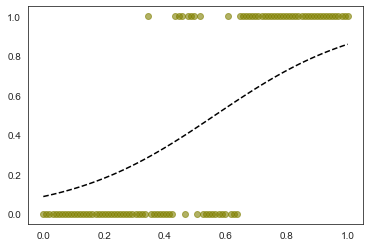

In [23]:
# Fit Logistic and visualize 
model = LogisticRegression()
model.fit(X, y)

probs= model.predict_proba(X)
heads= [p[1] for p in probs]

plt.scatter(x, y, alpha=0.6, color= 'olive')
plt.plot(x, heads, 'k--')
plt.show()

We still don't get quite high confidence level for x values near ends, so the model is being **too conservative**

## IV. The Return of Model Complexity

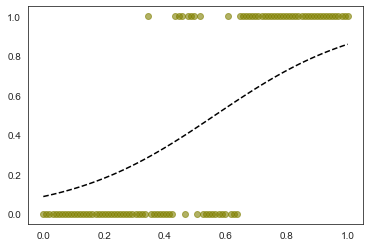

LogisticRegression()

In [27]:
# Write a helper function 
def fit_plot_classifier(model):
    model.fit(X, y)
    pred= model.predict_proba(X)
    pred=[p[1] for p in pred]
    
    plt.scatter(x, y, alpha=0.6, color= 'olive')
    plt.plot(x, pred, 'k--')
    plt.show()

    return model

fit_plot_classifier(LogisticRegression())

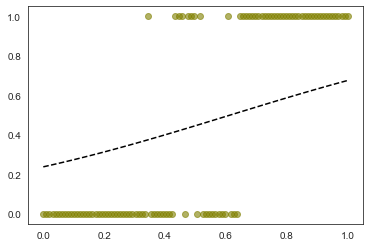

LogisticRegression(C=0.25)

In [28]:
# Logistic is regularized by default with C = 1, try a stronger penalty:
fit_plot_classifier(LogisticRegression(C= .25))

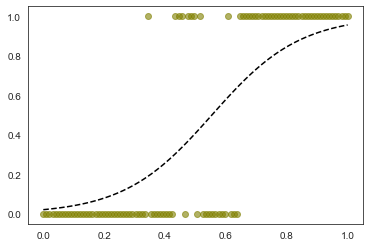

LogisticRegression(C=4)

In [29]:
# Weaker penalty
fit_plot_classifier(LogisticRegression(C= 4))

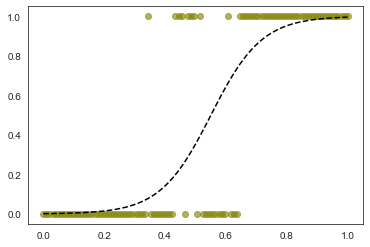

LogisticRegression(C=10000)

In [30]:
# We can set a REALLY high C to basically impose no penalty
fit_plot_classifier(LogisticRegression(C= 10000))

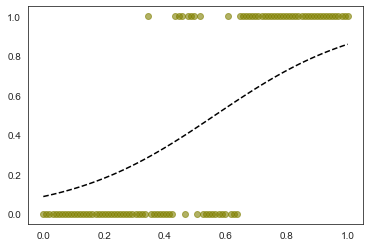

LogisticRegression()

In [34]:
# By default, Logistic regression uses L2 penalty
fit_plot_classifier(LogisticRegression(penalty= 'l2'))

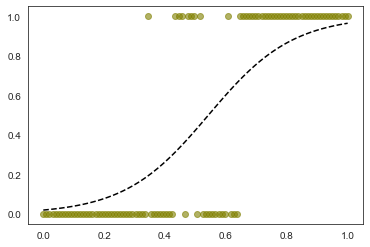

LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

In [36]:
# Switch to l1, don't forget to use seed, and l1 need the "liblinear" solver
fit_plot_classifier(LogisticRegression(penalty= 'l1', solver= 'liblinear', random_state=123))

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 3.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've successfully generated the simulated noisy conditional dataset. Plot its scatterplot.

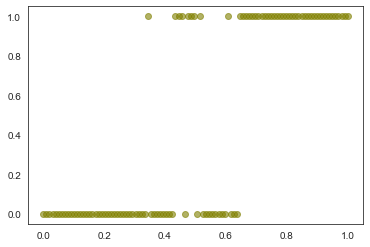

In [39]:
plt.scatter(x, y, color='olive', alpha=0.6)
plt.show()

#### B.) Next, confirm that you've reshaped in the input feature $x$ to have 2 "dimensions." Display the shape of <code>X</code>.

In [40]:
X.shape

(100, 1)

#### C.) Finally, confirm that you've correctly written a helper function to help you fit and plot classifiers. Fit and plot an L1-regularized logistic regression on the noisy conditional dataset with $C = 0.5$.
* What do you expect to see?

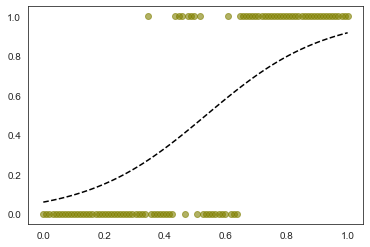

LogisticRegression(C=0.5, penalty='l1', random_state=123, solver='liblinear')

In [41]:
fit_plot_classifier(LogisticRegression(penalty='l1', solver='liblinear', C= .5, random_state= 123))

## <span style="color:RoyalBlue">Exercise 3.2 - Random Forest Classifiers</span>

In the Coding Section, we took a close look at regularized logistic regression, and we looked at how varying the model complexity affects the model. Now, let's do the same thing for our first tree ensemble, the random forest.

Just to recap, random forests train a large number of "strong" decision trees and combine their predictions through bagging. In addition, there are two sources of "randomness" for random forests:
1. Each decision tree is only allowed to choose from a random subset of features to split on.
2. Each decision tree is only trained on a random subset of observations (a process called **resampling**).

#### A.) First, import the <code style="color:steelblue">RandomForestClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [42]:
from sklearn.ensemble import RandomForestClassifier

Now, we've alluded to "default" hyperparameter settings for various algorithms, but you can actually very easily see what they are for yourself.

#### B.) Simply display an *instance* of <code>RandomForestClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the random forest classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

In [43]:
RandomForestClassifier()

RandomForestClassifier()

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
</pre>

#### C.) Fit and plot a random forest with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

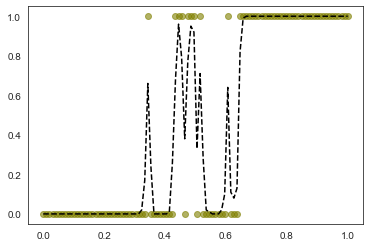

RandomForestClassifier(random_state=123)

In [45]:
fit_plot_classifier(RandomForestClassifier(random_state= 123))

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="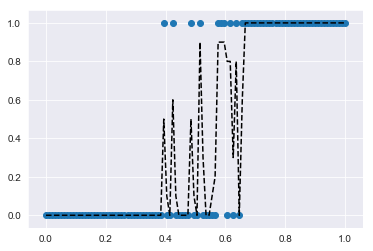&#10;">

For this simulated dataset, it's plain to see that the default random forest **suffers from overfitting**. That's not surprising because the dataset is incredibly simple, and decision trees may be too complex.

However, it's worth trying to tune the hyperparameters and overall model complexity to see if we can arrive at a better random forest.

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot random forests with 20, 50, 100, and 200 trees.
* For this dataset, does increasing the number of trees in the random forest help the model?

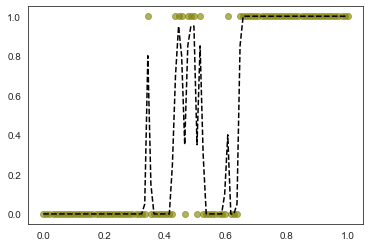

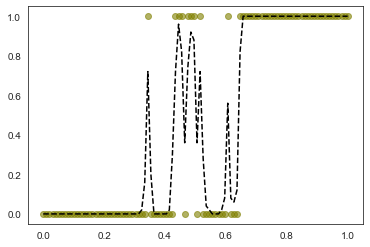

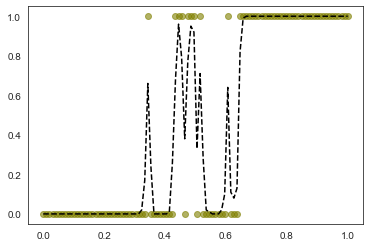

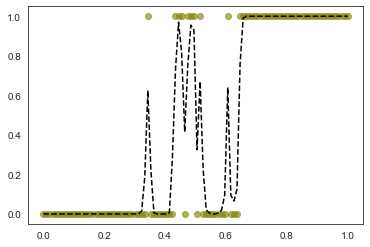

In [48]:
trees= [20, 50, 100, 200]
for number in trees:
    fit_plot_classifier(RandomForestClassifier(n_estimators= number, random_state= 123))

#### E.) Next, fit and plot random forests that set a higher minimum leaf size. Try minimum leaf sizes of 2, 5, 10, and 20.
* Does increasing the minimum leaf size improve the model?
* What can you conclude?

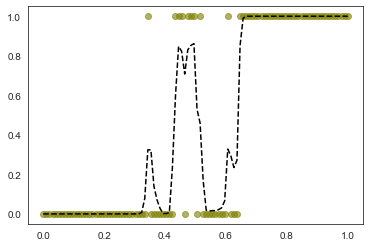

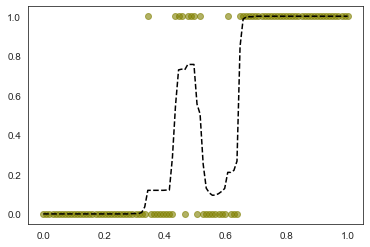

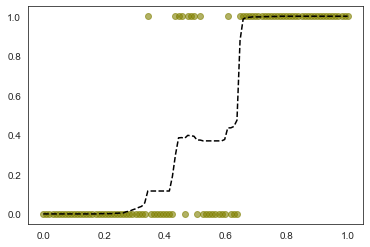

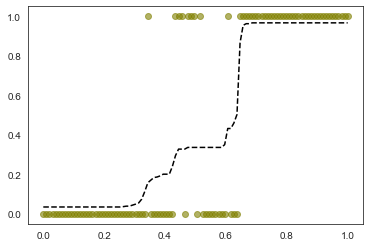

In [47]:
sizes= [2, 5, 10, 20]
for number in sizes:
    fit_plot_classifier(RandomForestClassifier(min_samples_leaf= number, random_state= 123))

## <span style="color:RoyalBlue">Exercise 3.3 - Gradient Boosted Classifiers</span>

Next, let's repeat the same exercise for gradient boosted trees and see if tuning the hyperparameters the same way has the same effects.

Just to recap, boosted trees train a sequence of "weak", **constrained** decision trees and combine their predictions through boosting. 
* Each decision tree is allowed a **maximum depth**, which should be tuned.
* Each decision tree in the sequence tries to correct the prediction errors of the one before it.

#### A.) First, import the <code style="color:steelblue">GradientBoostingClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

#### B.) Next, display an *instance* of <code>GradientBoostingClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the gradient boosted classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
</pre>

#### C.) Fit and plot a gradient boosted tree with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

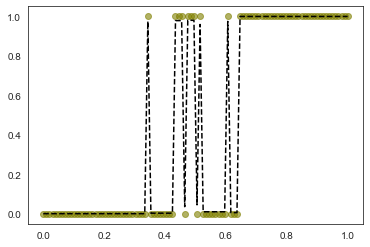

GradientBoostingClassifier()

In [50]:
fit_plot_classifier(GradientBoostingClassifier())

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="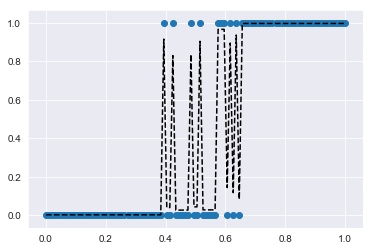&#10;">

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot boosted classifiers with 10, 20, 50, and 200 trees.
* For this dataset, does decreasing or increasing the number of trees in the classifier help the model?

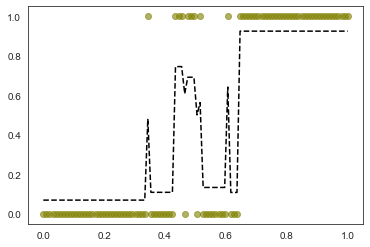

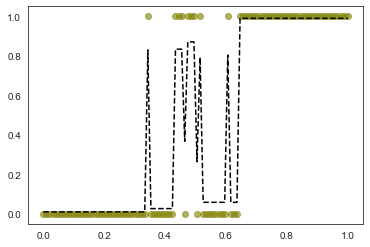

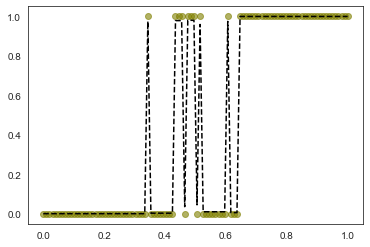

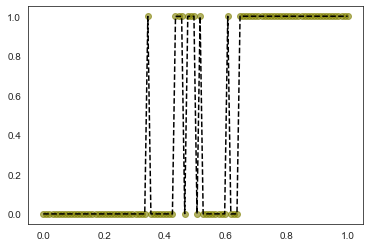

In [51]:
trees= [20, 50, 100, 200]
for number in trees:
    fit_plot_classifier(GradientBoostingClassifier(n_estimators= number, random_state= 123))

#### E.) Next, fit and plot boosted trees with different max depth values. Try max depth values of 1, 2, 5, and 10.
* Does changing the max depth improve the model?
* What can you conclude?

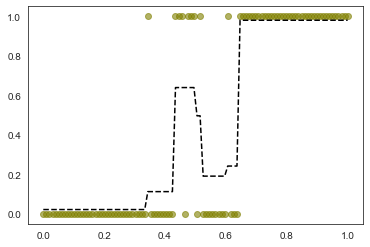

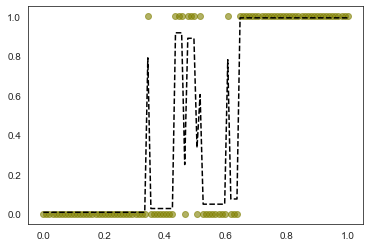

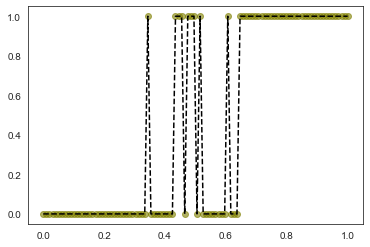

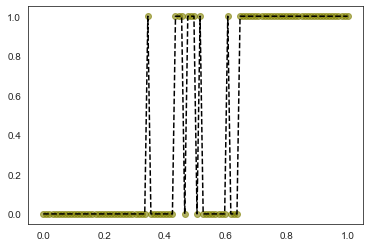

In [53]:
trees= [1, 2, 5, 10]
for number in trees:
    fit_plot_classifier(GradientBoostingClassifier(max_depth=number, random_state= 123))

Alright, that was a nice tour through some additional key theory and concepts, but let's get ready to dive back into the project! As a reminder, here are a few things you did in this module:
* You learned some key terminology for binary classification, such as "positive" vs. "negative" classes.
* You saw how logistic regression can also be regularized.
* You played around with different settings for penalty strength.
* And you recruited 4 algorithms: $L_1$-Regularized Logistic, $L_2$-Regularized Logistic, Random Forests, and Boosted Trees.

Now that we've recruited our 4 candidate algorithms, it's time to see which one performs the best! In the next module, we'll plug these algorithms into the powerful modeling process you learned in the previous project.